<a href="https://colab.research.google.com/github/jwy6669/6100_lab/blob/main/CS4780_RegressionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's import the necessary libraries:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
#%matplotlib notebook

Now, let's create a synthetic dataset with a real-valued label. We will use a sine function to generate the labels.


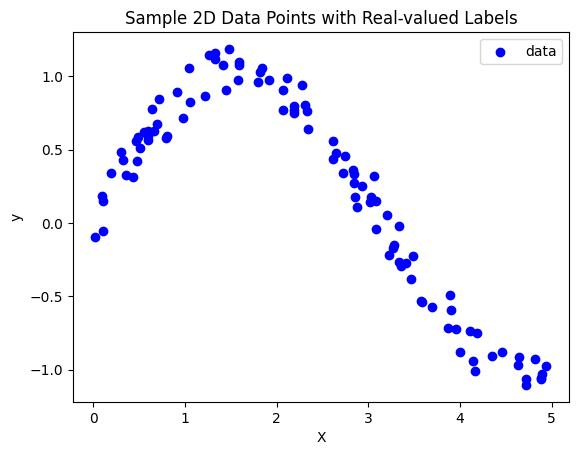

In [ ]:
np.random.seed(0)

n_samples = 100

X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randn(n_samples)*0.1

plt.figure()
plt.scatter(X, y, color='blue', label='data')
plt.title('Sample 2D Data Points with Real-valued Labels')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Next, let's split the data into training and testing sets:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now, we'll create and fit a regression tree:

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2)

Let's visualize the regression tree's predictions:

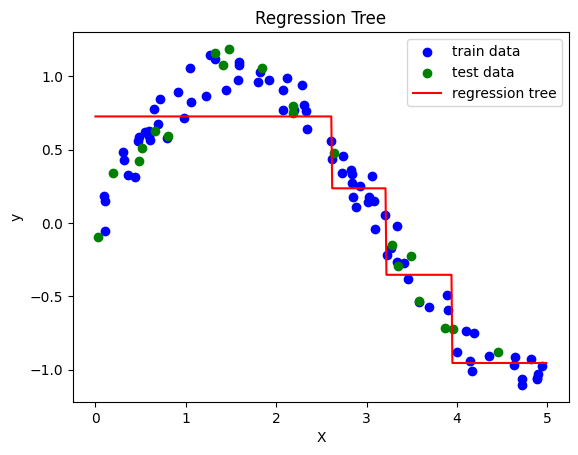

In [ ]:

X_grid = np.arange(0, 5, 0.01)[:, np.newaxis]
y_pred = reg_tree.predict(X_grid)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.scatter(X_test, y_test, color='green', label='test data')
plt.plot(X_grid, y_pred, color='red', label='regression tree')
plt.title('Regression Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Finally, let's experiment with different tree depths and visualize the results:

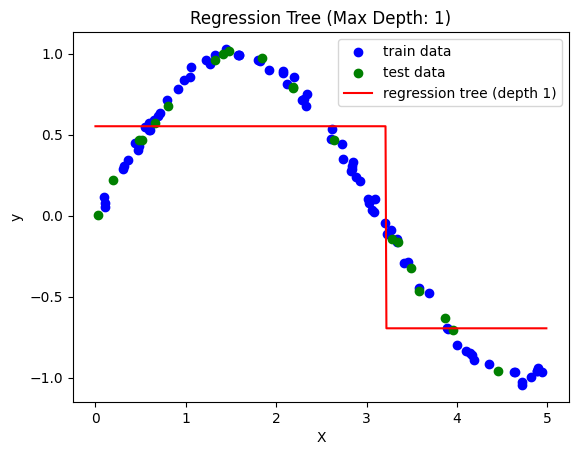

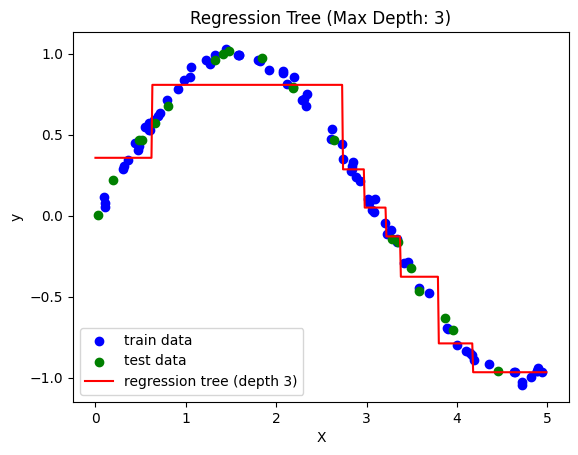

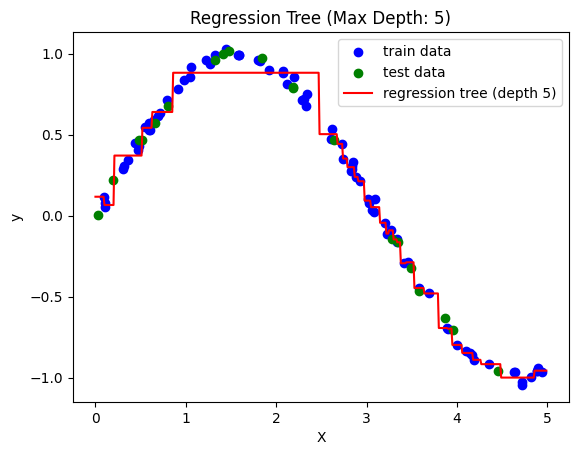

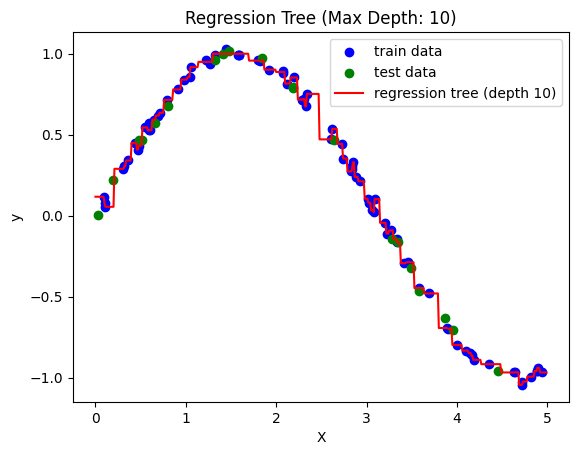

In [ ]:
tree_depths = [1, 3, 5, 10]

for depth in tree_depths:
    reg_tree = DecisionTreeRegressor(max_depth=depth)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_grid)
    plt.figure()
    plt.scatter(X_train, y_train, color='blue', label='train data')
    plt.scatter(X_test, y_test, color='green', label='test data')
    plt.plot(X_grid, y_pred, color='red', label=f'regression tree (depth {depth})')
    plt.title(f'Regression Tree (Max Depth: {depth})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(0)

n_samples = 500

X1 = 5 * np.random.rand(n_samples, 1)
X2 = 5 * np.random.rand(n_samples, 1)
X = np.hstack((X1, X2))
y = np.sin(X1).ravel() * np.cos(X2).ravel()
y += 0.1 * (0.5 - np.random.rand(n_samples))

fig = px.scatter_3d(x=X1.ravel(), y=X2.ravel(), z=y, color=y, opacity=0.8)
fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='y'), title='Sample 3D Data Points with Real-valued Labels')
fig.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2)

In [ ]:
X1_grid, X2_grid = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1))
X_grid = np.c_[X1_grid.ravel(), X2_grid.ravel()]
y_pred = reg_tree.predict(X_grid)
y_pred_grid = y_pred.reshape(X1_grid.shape)

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train, mode='markers', marker=dict(color='blue', opacity=0.6), name='train data'))
fig.add_trace(go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test, mode='markers', marker=dict(color='green', opacity=0.6), name='test data'))
fig.add_trace(go.Surface(x=X1_grid, y=X2_grid, z=y_pred_grid, colorscale='reds', showscale=False, opacity=0.4, name='regression tree'))
fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='y'), title='Regression Tree')
fig.show()


In [ ]:
tree_depths = [1, 3, 5, 10]

for depth in tree_depths:
    reg_tree = DecisionTreeRegressor(max_depth=depth)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_grid)
    y_pred_grid = y_pred.reshape(X1_grid.shape)
    
    fig = make_subplots(rows=1, cols=1);
    fig.add_trace(go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train, mode='markers', marker=dict(color='blue', opacity=0.6), name='train data'))
    fig.add_trace(go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test, mode='markers', marker=dict(color='green', opacity=0.6), name='test data'))
    fig.add_trace(go.Surface(x=X1_grid, y=X2_grid, z=y_pred_grid, colorscale='reds', showscale=False, opacity=0.4, name=f'regression tree (depth {depth})'))
    fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='y'), title=f'Regression Tree (Max Depth: {depth})')
    fig.show()
